# MCMC

In [1]:
import hypothesis
import numpy as np
import torch
import matplotlib.pyplot as plt

## Observations

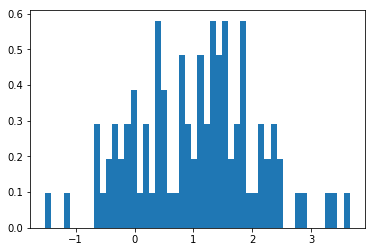

In [2]:
num_observations = 100
theta_true = 1.

N = torch.distributions.normal.Normal(theta_true, 1.)
observations = N.sample(torch.Size([num_observations])).view(-1)

plt.hist(observations.numpy(), bins=50, density=True)
plt.show()

## Metropolis-Hastings

In [3]:
from hypothesis.inference.mcmc import MetropolisHastings as MH
from hypothesis.transition import Normal as NormalTransition

def log_likelihood(observations, theta):
    with torch.no_grad():
        N = torch.distributions.normal.Normal(theta.item(), 1.)
        likelihood = N.log_prob(observations).sum()
        
    return likelihood

transition = NormalTransition(1.)
sampler = MH(log_likelihood, transition)

In [4]:
theta_0 = torch.tensor(5, dtype=torch.float32)
_, chain = sampler.infer(observations, theta_0=theta_0, samples=50000, burnin_samples=10000)

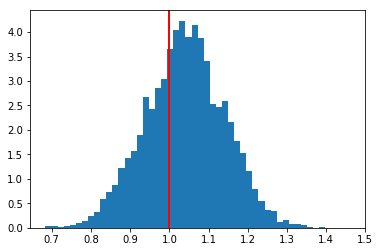

In [5]:
samples = chain.get()

plt.hist(samples.numpy(), density=True, bins=50)
plt.axvline(theta_true, lw=2, color="red")
plt.show()